# 1. Load in Libraries

In [2]:
#!pip install squarify
#!pip install textacy
import nltk
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_sm')
from  textacy import preprocessing as tprep
import gensim

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import os
os.chdir('C:/Users/T430/Google Drive/00 - Masters/Disseration/00 - Actual Disseration')
from itertools import chain
import pandas as pd
from nltk import word_tokenize
from nltk import FreqDist

# 2. Open up the data

In [3]:
params = {'Asset tags': 'btc|bitcoin',
          'Asset name': 'btc', #this will appear in the folder name so can determine what is trained on
          'Remove list' :[
              'btc',
              'bitcoin', 
              'crypto', 
              'cryptocurrency',
              'coin'
                          
                          
                        ],
          'num_topics': 8
}

In [48]:
from gensim.models.coherencemodel import CoherenceModel

lda_gensim_para_coherence = CoherenceModel(model=ldamallet,
    texts=docs, dictionary=dictionary, coherence='c_v')
lda_gensim_para_coherence_score = lda_gensim_para_coherence.get_coherence()
print(lda_gensim_para_coherence_score)




0.32578543144804867


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

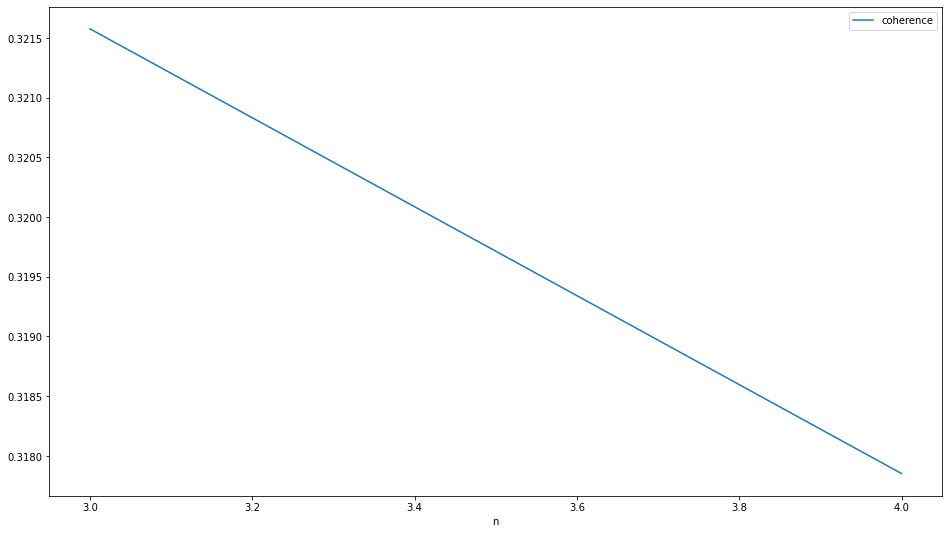

In [56]:

from gensim.models.ldamulticore import LdaMulticore
lda_para_model_n = []
for n in range(3, 5):
    lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='c_v')
    lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
fig.figure.savefig(f'{results_folder}/Best_coherence.png')




In [70]:
bestop = bestco_df.idxmax()[0]

3

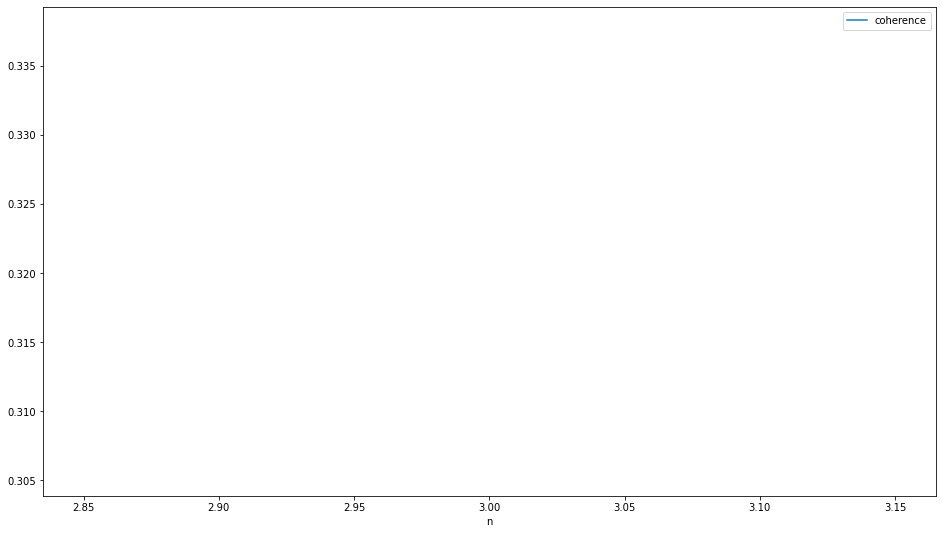

Populating the interactive namespace from numpy and matplotlib
exported clean data


C:\Users\T430\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['save', 'title', 'show', 'figure', 'source']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Number of unique words in initital documents: 20690
Number of unique words after removing rare and common words: 5318
[(0,
  [('work', 0.020423015692517626),
   ('news', 0.018558107800773254),
   ('change', 0.015510575392312941),
   ('wallet', 0.015328633158972026),
   ('love', 0.01487377757561974),
   ('life', 0.012735956333863999),
   ('mining', 0.012463042983852627),
   ('find', 0.011416875142142369),
   ('network', 0.011325904025471912),
   ('rt', 0.011143961792130999)]),
 (1,
  [('day', 0.033224844046650395),
   ('look_like', 0.023415604375734565),
   ('doge', 0.023008769550673536),
   ('pay', 0.01844317873609981),
   ('week', 0.018217159388843687),
   ('high', 0.017493897477624084),
   ('break', 0.014872073049453033),
   ('wait', 0.013696772443721182),
   ('guy', 0.013606364704818732),
   ('month', 0.013515956965916282)]),
 (2,
  [('eth', 0.07139157458563536),
   ('currency', 0.045925414364640885),
   ('xrp', 0.034098756906077346),
   ('ltc', 0.02736533149171271),
   ('alt', 0.02

C:\Users\T430\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Loading BokehJS ...

C:\Users\T430\anaconda3\lib\site-packages\bokeh\io\saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\T430\anaconda3\lib\site-packages\bokeh\io\saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


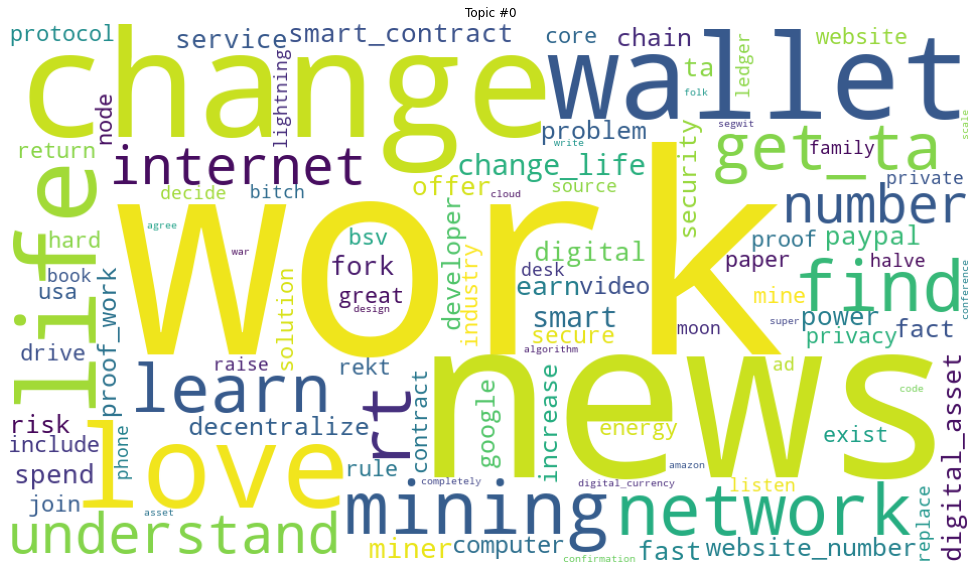

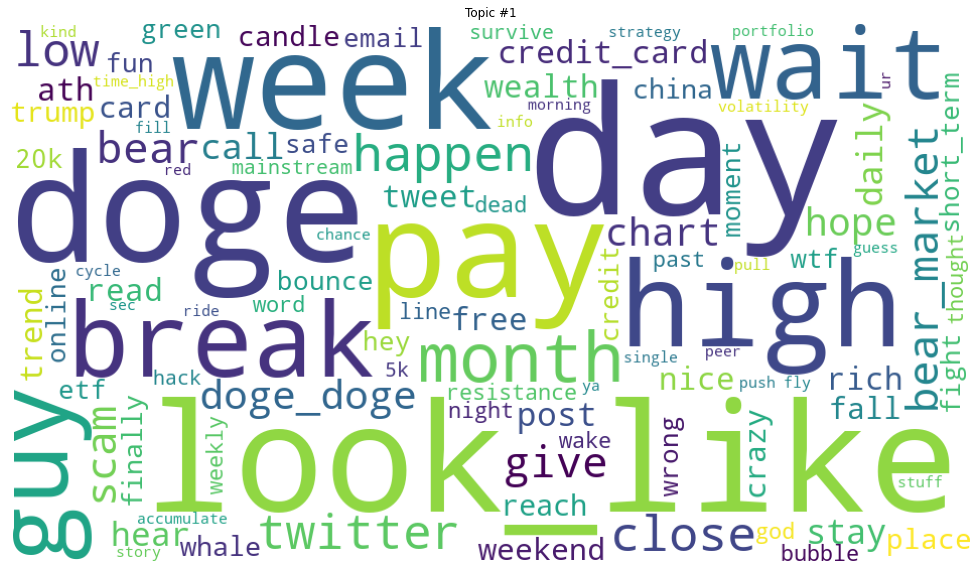

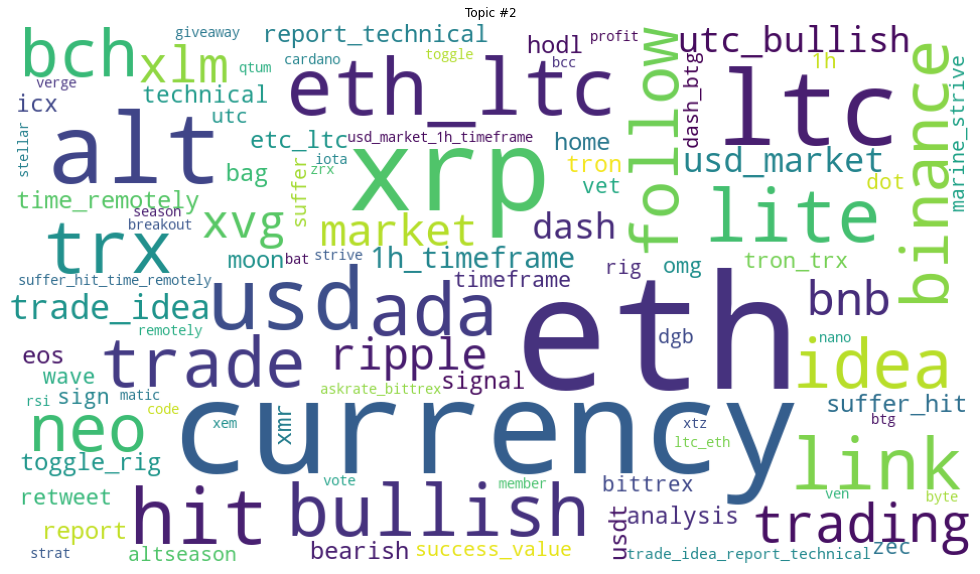

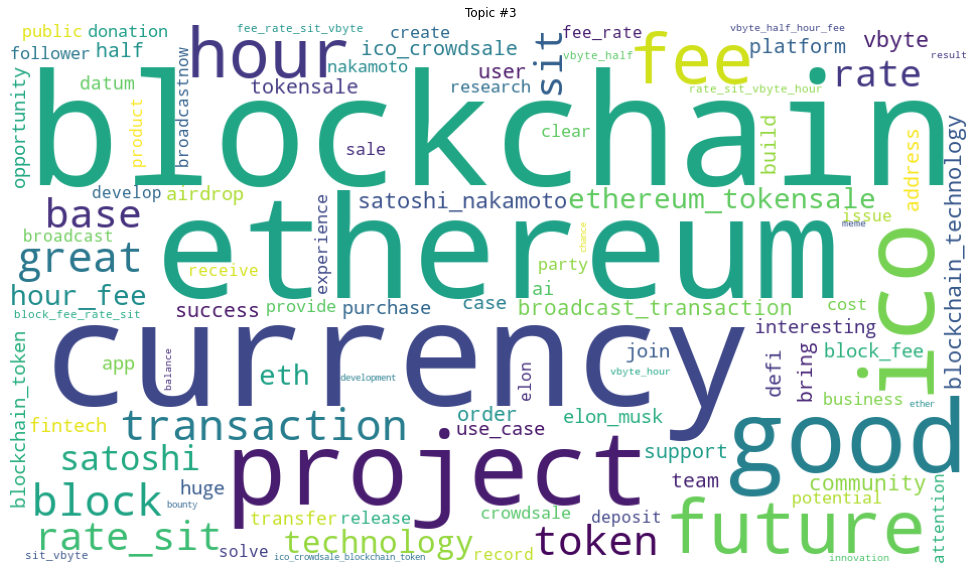

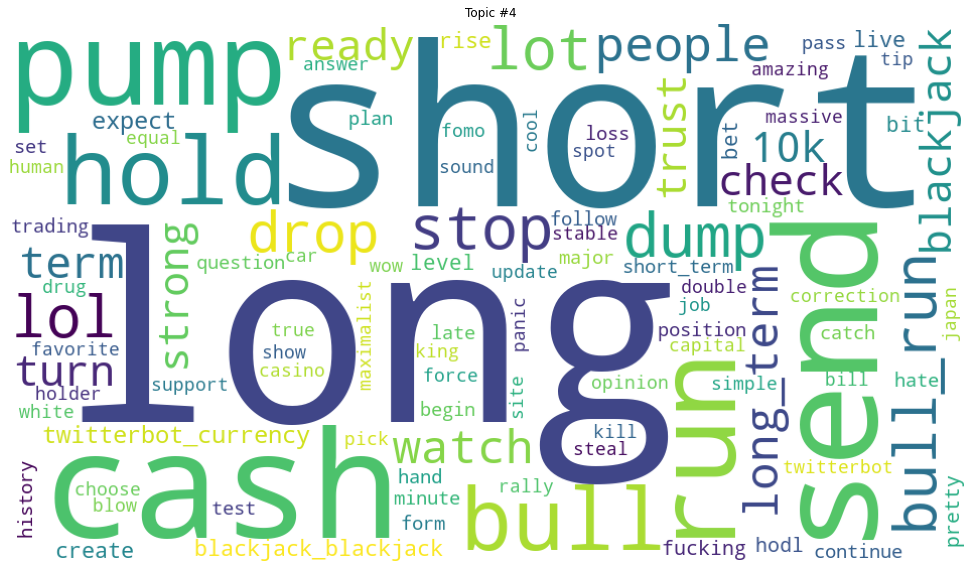

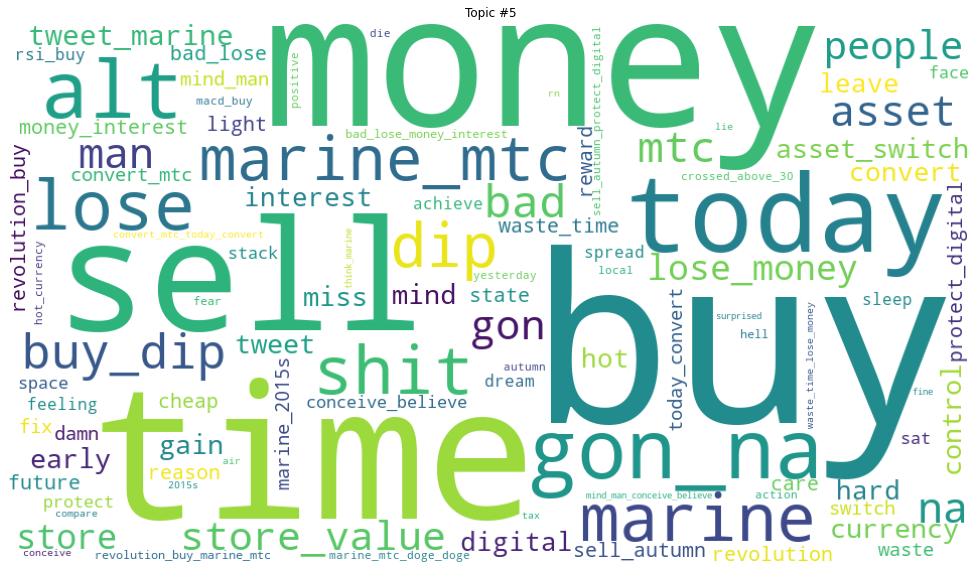

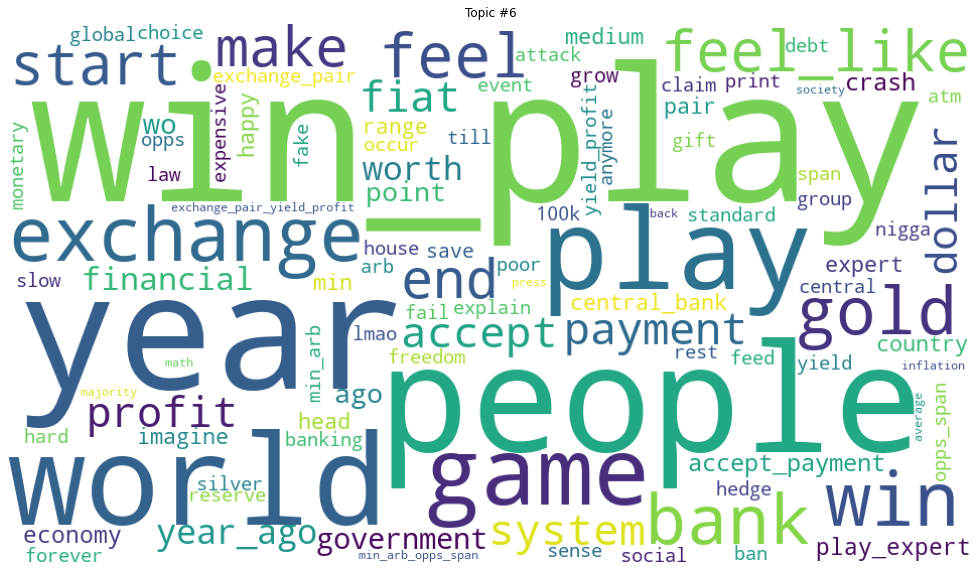

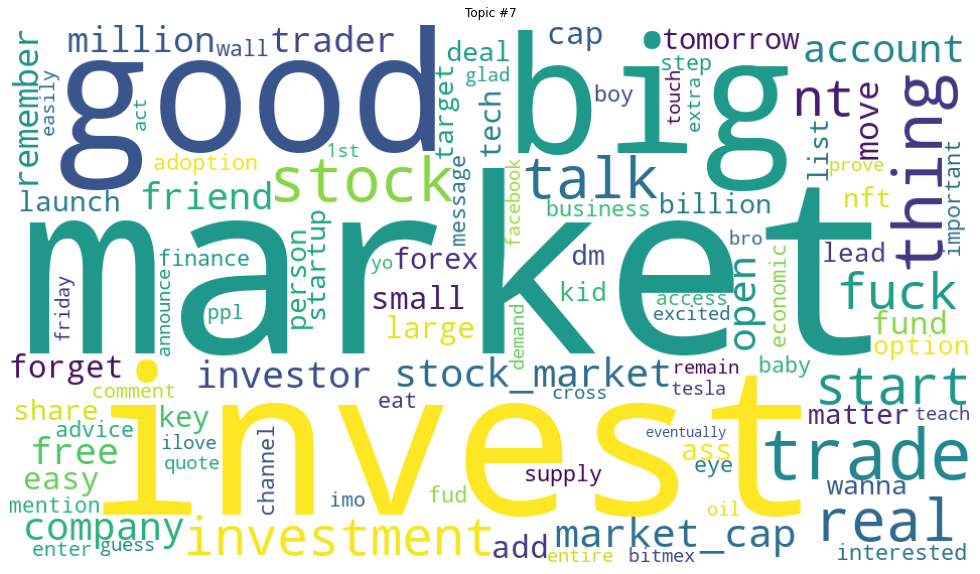

In [46]:
from datetime import datetime as dt
import os
mask = "D-%y%m%d-T-%H.%M.%S"

dte = dt.now().strftime(mask)

results_folder = "results/" + params['Asset name'] + "/" + params['Asset name'] + dte
num_topics = params['num_topics']
os.makedirs(f"{results_folder}")
import pandas as pd

df = pd.read_csv(f'data/ryan_bitcoin_data250821.csv')
   



#df = df[~df.text.str.contains(r'[0-9]')]

#reset index
df = df.reset_index(drop=True)

#program to clean tweets
import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    #no hashtags
    #text = re.sub('\#[\w\_]+',' ', text)
    #no dollar
    #text = re.sub('\$[\w\_]+',' ', text)
    return text.strip()

#apply clean
df['text1'] = df['text'].map(clean)

#convert to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s) #convert all to lowercase



#remove tweets that aren't useful
df = df[~df.text1.str.contains('Current price:')]
df = df[~df.text1.str.contains('Current price')]
df = df[~df.text1.str.contains('current price')]
df = df[~df.text1.str.contains('current rate:')]
df = df[~df.text1.str.contains('Current rate:')]
df = df[~df.text1.str.contains('volume alert')]
df = df[~df.text1.str.contains('price update')]
df = df[~df.text1.str.contains('prices update')]
df = df[~df.text1.str.contains('price action')]
df = df[~df.text1.str.contains('price action')]
df = df[~df.text1.str.contains('price increase')]
df = df[~df.text1.str.contains('price decrease')]
df = df[~df.text1.str.contains('density')]
df = df[~df.text1.str.contains('volume')]
df = df[~df.text1.str.contains('last hour')]
df = df[~df.text1.str.contains('latest block info')]
df = df[~df.text1.str.contains('closed sell')]
df = df[~df.text1.str.contains('alert')]
df = df[~df.text1.str.contains('hourly update')]
df = df[~df.text1.str.contains('%')]


searchfor = ['current', 'price']
df = df[~df.text1.str.contains('|'.join(searchfor))]



df = df.reset_index(drop=True)

#keep tweets that are of interest for that asset
#df_btc = df[df.text1.str.contains(params['Asset tags'], na=False)]
df_btc = df 
df_btc = df_btc.reset_index(drop=True)

#delete words i don't think are useful to the analysis
import re
To_remove_lst = params['Remove list']
p = re.compile('|'.join(map(re.escape, To_remove_lst)))
df_btc['text1'] = [p.sub('', text) for text in df_btc['text1']] 

#get rid of tweets that have 10 or more numbers, these are tweets that just report value
def count_digits(string):
    return sum(item.isdigit() for item in string)


df_btc['count_num'] = df_btc['text'].apply(count_digits)
df_btc = df_btc[['text', 'text1', 'count_num']].loc[df_btc['count_num'] < 10] # so take it to be >= get rid 
df_btc = df_btc.reset_index(drop=True)


#sample down for speed
df = df_btc.sample(frac=0.1, replace=True, random_state=123)
#df=df_btc
df = df.reset_index(drop=True)

#delete stopwords
df['text2'] = df['text1'].map(nlp)
def stop_words(doc):
    non_stop = [t for t in doc if not t.is_stop and not t.is_punct]
    return non_stop
df['text3'] = df['text2'].map(stop_words)

#my own lemmatisation because looks like the one below doesnt work
def lemma(doc):
    doclems = [t.lemma_ for t in doc]
    return doclems
df['text4'] = df['text3'].map(lemma)
#df['text4'] = df['text3']
%pylab inline

import pandas as pd
import pickle as pk
from scipy import sparse as sp

#converting to a string
df['text5'] = [' '.join(map(str, l)) for l in df['text4']]

cleandf = df[['text5']]
cleandf.to_csv(f'{results_folder}/00 - Cleaned Text.csv')
print("exported clean data")

docs = array(df['text5'])


#more preprocessing of the docs
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    
    # Lemmatize all words in documents.
    #lemmatizer = WordNetLemmatizer()
    #docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
docs = docs_preprocessor(docs)

from gensim.models import Phrases
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=30)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.id2word
            docs[idx].append(token)
            
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 3% of the documents. The original here was 20% 

dictionary.filter_extremes(no_below=5, no_above=0.8)
dictionary.save_as_text(f'{results_folder}/dict_text.txt') 

print('Number of unique words after removing rare and common words:', len(dictionary))


temp = dictionary[0]
id2word = dictionary.id2token

#-----------------------------------------------------------------------------------------------------------------------------------------------


corpus = [dictionary.doc2bow(doc) for doc in docs]


from gensim.models import LdaModel

import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = r'C:\\new_mallet\\mallet-2.0.8\\bin\\mallet' 
#You should update this path as per the path of Mallet directory on your system.

temp = dictionary[0]  # This is only to "load" the dictionary.

#num_topics = 8
ldamallet = gensim.models.wrappers.LdaMallet(
   mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word
)

pprint(ldamallet.show_topics(formatted=False))


model2 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

#pyLDAvis.gensim_models.prepare(model2, corpus, dictionary)


data = df.text.values.tolist()
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    originalcont = pd.Series(df['text'])
    sent_topics_df = pd.concat([sent_topics_df, contents, originalcont], axis=1)
    return(sent_topics_df)



df_topic_sents_keywords = format_topics_sentences(ldamodel=model2, corpus=corpus, texts=docs)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']

#save this
df_dominant_topic.head(10)
df_dominant_topic.to_csv(f'{results_folder}/01 - First ten documents.csv', index=True)

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Text"]

# Show and save
sent_topics_sorteddf_mallet.head(20)
sent_topics_sorteddf_mallet.to_csv(f'{results_folder}/02 - Topic examples.csv', index=True)


#word clouds
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model2.show_topics(formatted=False)

for t in range(model2.num_topics):
    plt.figure(figsize=(20,10))
    plt.imshow(WordCloud(background_color="white", max_words=100, width=960,height=540).fit_words(dict(model2.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig(f'{results_folder}/03 - Topic_{t}.png')
    #plt.show()
    




#save stuff
import pickle

#pickle.dump(corpus, open('btc_corpus.pkl', 'wb'))
#dictionary.save('btc_dict.gensim')
#pickle.dump(model2, open('btc_model.pkl', 'wb'))
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

a = pyLDAvis.gensim_models.prepare(model2, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(a, f'{results_folder}/04 - btc_pyLDAvis.html')


from sklearn.metrics.pairwise import cosine_similarity
model=model2
df['tokenz'] = docs

docs1 = df['tokenz'].apply(lambda l: l[:int0(len(l)/2)])
docs2 = df['tokenz'].apply(lambda l: l[int0(len(l)/2):])

corpus1 = [dictionary.doc2bow(doc) for doc in docs1]
corpus2 = [dictionary.doc2bow(doc) for doc in docs2]

# Using the corpus LDA model tranformation
lda_corpus1 = model[corpus1]
lda_corpus2 = model[corpus2]

from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False):
    
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    '''
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [array(vals)]
        if kwords:
            keys += [array(vals).argmax()]

    return array(top_dist), keys

top_dist1, _ = get_doc_topic_dist(model, lda_corpus1)
top_dist2, _ = get_doc_topic_dist(model, lda_corpus2)

print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
print(mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

random_pairs = np.random.randint(0, len(df['text']), size=(400, 2))

print("Inter similarity: cosine similarity between random parts (lower is better):")
print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))


def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

# topic_summaries = []
# print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
# for i in range(num_topics):
#     print('Topic '+str(i)+' |---------------------\n')
#     tmp = explore_topic(model,topic_number=i, topn=10, output=True )
# #     print tmp[:5]
#     topic_summaries += [tmp[:5]]
#     print

##export the term and frequency of each topic 
df_tf = pd.DataFrame()
for i in range(num_topics):
    stats = model2.show_topic(i, 30)
    name_list = [x[0] for x in stats]
    imp_list = [x[1] for x in stats]
    dfint = pd.DataFrame(list(zip(name_list, imp_list)), columns =['Term', 'Frequency'])
    dfint['Topic'] = f'Topic {i}'
    df_tf = df_tf.append(dfint)

df_tf.to_csv(f'{results_folder}/05 - Topic word frequencies.csv', index=True)    
    
    
    
top_labels = {0: 'zero', 1:'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six', 7:'seven', 8: 'eight', 9:'nine', 10:' ten'}

import re
import nltk

from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

def paper_to_wordlist( paper, remove_stopwords=True ):
    '''
        Function converts text to a sequence of words,
        Returns a list of words.
    '''
    lemmatizer = WordNetLemmatizer()
    # 1. Remove non-letters
    paper_text = re.sub("[^a-zA-Z]"," ", paper)
    # 2. Convert words to lower case and split them
    words = paper_text.lower().split()
    # 3. Remove stop words
    words = [w for w in words if not w in stops]
    # 4. Remove short words
    words = [t for t in words if len(t) > 2]
    # 5. lemmatizing
    words = [nltk.stem.WordNetLemmatizer().lemmatize(t) for t in words]

    return(words)

from sklearn.feature_extraction.text import TfidfVectorizer

tvectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words='english',\
                                  tokenizer=paper_to_wordlist, ngram_range=(1, 3), min_df=40, max_df=0.20,\
                                  norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)

dtm = tvectorizer.fit_transform(df['text']).toarray()


top_dist =[]
for d in corpus:
    tmp = {i:0 for i in range(num_topics)}
    tmp.update(dict(model[d]))
    vals = list(OrderedDict(tmp).values())
    top_dist += [array(vals)]
    
top_dist, lda_keys= get_doc_topic_dist(model, corpus, True)
features = tvectorizer.get_feature_names()    

top_ws = []
for n in range(len(dtm)):
    inds = int0(argsort(dtm[n])[::-1][:4])
    tmp = [features[i] for i in inds]
    
    top_ws += [' '.join(tmp)]
    
df['Text_Rep'] = pd.DataFrame(top_ws)
df['clusters'] = pd.DataFrame(lda_keys)
df['clusters'].fillna(10, inplace=True)

cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'black', 10:'gray'}

df['colors'] = df['clusters'].apply(lambda l: cluster_colors[l])

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(top_dist)

df['X_tsne'] =X_tsne[:, 0]
df['Y_tsne'] =X_tsne[:, 1]

from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()


source = ColumnDataSource(dict(
    x=df['X_tsne'],
    y=df['Y_tsne'],
    color=df['colors'],
    label=df['clusters'].apply(lambda l: top_labels[l]),
#     msize= p_df['marker_size'],
    topic_key= df['clusters'],
    #title= df[u'Title'],
    content = df['text']
))


    
title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=600,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover", x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.8, size=10)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - Topic: @topic_key "}
plot_lda.legend.location = "top_left"

from bokeh.models import Model
from bokeh.io import curdoc

curdoc().clear()
for model in plot_lda.select({'type': Model}):
    prev_doc = model.document
    model._document = None
    if prev_doc:
        prev_doc.remove_root(model)
        

#save the plot
save(plot_lda, f'{results_folder}/06 - Tsnse.html'.format(title))

#show(plot_lda)
#pyLDAvis.save_html(a, f'results/btc/04 - btc_pyLDAvis.html')



# try:
#     reset_output()
#     output_notebook()
#     show(plot_lda)
# except:
#     output_notebook()
#     show(plot_lda)

from bokeh.models import Model
from bokeh.io import curdoc

curdoc().clear()
for model in plot_lda.select({'type': Model}):
    prev_doc = model.document
    model._document = None
    if prev_doc:
        prev_doc.remove_root(model)
        
show(plot_lda)



In [473]:
cleandf

NameError: name 'cleandf' is not defined

C:\Users\T430\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Text(0, 0.5, '%')

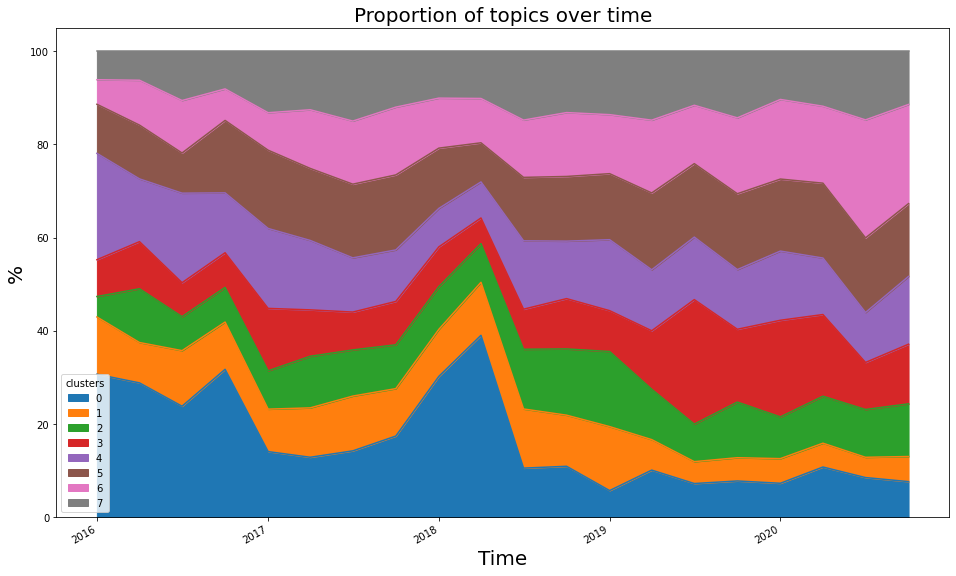

In [14]:
df['date1'] = pd.DatetimeIndex(df['date'])
df['month_year'] = df['date1'].dt.to_period( freq = 'Q')
df['year'] = pd.DatetimeIndex(df['date']).year
df_ts = df.groupby(['month_year','clusters'], as_index=True).count()
df_ts1 = df_ts[['date']]
df_ts2 = df_ts1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_ts3 = df_ts2.pivot_table(index=["month_year"], 
                    columns='clusters', 
                    values='date')
#columns = ["app ride", "moto mirror", "button bit", "battery work", "bike break", "time case", "helmet scooter"]
# df_ts3.columns = columns
#df_ts3.index= pd.to_datetime(df_ts3.index,format='%Y')
df_ts3.plot.area(figsize=(16,10), use_index=True,x_compat=True)

plt.title('Proportion of topics over time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('%', fontsize=20)

<AxesSubplot:xlabel='month_year'>

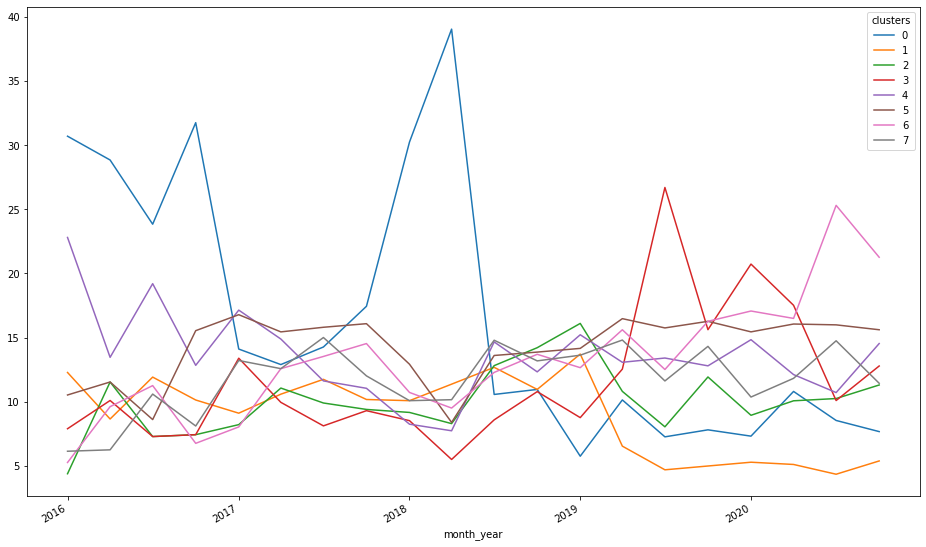

In [15]:
df_ts3.plot(figsize=(16,10), use_index=True,x_compat=True)

In [19]:
df_ts3

clusters            0          1          2          3          4          5  \
month_year                                                                     
2016Q1      30.701754  12.280702   4.385965   7.894737  22.807018  10.526316   
2016Q2      28.846154   8.653846  11.538462  10.096154  13.461538  11.538462   
2016Q3      23.841060  11.920530   7.284768   7.284768  19.205298   8.609272   
2016Q4      31.756757  10.135135   7.432432   7.432432  12.837838  15.540541   
2017Q1      14.107143   9.107143   8.214286  13.392857  17.142857  16.785714   
2017Q2      12.898089  10.589172  11.066879   9.952229  14.888535  15.445860   
2017Q3      14.268143  11.746617   9.901599   8.118081  11.623616  15.805658   
2017Q4      17.441860  10.174419   9.399225   9.302326  11.046512  16.085271   
2018Q1      30.247479  10.082493   9.165903   8.524290   8.249313  12.923923   
2018Q2      39.049394  11.369991   8.294501   5.498602   7.735322   8.387698   
2018Q3      10.568032  12.681638  12.813738   8.586526  14.663144  13.606341   
2018Q4      10.958904  10.958904  14.212329  10.787671  12.328767  13.869863   
2019Q1       5.752212  13.716814  16.106195   8.761062  15.221239  14.159292   
2019Q2      10.140093   6.537692  10.807205  12.541694  13.075384  16.477652   
2019Q3       7.262570   4.692737   8.044693  26.703911  13.407821  15.754190   
2019Q4       7.809111   4.989154  11.930586  15.618221  12.798265  16.268980   
2020Q1       7.317073   5.284553   8.943089  20.731707  14.837398  15.447154   
2020Q2      10.802920   5.109489  10.072993  17.518248  12.116788  16.058394   
2020Q3       8.540373   4.347826  10.248447  10.093168  10.714286  15.993789   
2020Q4       7.671602   5.383580  11.305518  12.786003  14.535666  15.612382   

clusters            6          7  
month_year                        
2016Q1       5.263158   6.140351  
2016Q2       9.615385   6.250000  
2016Q3      11.258278  10.596026  
2016Q4       6.756757   8.108108  
2017Q1       8.035714  13.214286  
2017Q2      12.579618  12.579618  
2017Q3      13.530135  15.006150  
2017Q4      14.534884  12.015504  
2018Q1      10.724106  10.082493  
2018Q2       9.506058  10.158434  
2018Q3      12.285337  14.795244  
2018Q4      13.698630  13.184932  
2019Q1      12.654867  13.628319  
2019Q2      15.610407  14.809873  
2019Q3      12.513966  11.620112  
2019Q4      16.268980  14.316703  
2020Q1      17.073171  10.365854  
2020Q2      16.496350  11.824818  
2020Q3      25.310559  14.751553  
2020Q4      21.265141  11.440108

# VAR

In [20]:


import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr



In [21]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [22]:
ice_cream_heater_df = pd.read_csv('data/ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [23]:
ice_cream_heater_df

heater  ice cream
Month                        
2004-01-01      27         13
2004-02-01      18         15
2004-03-01      14         16
2004-04-01      13         19
2004-05-01      13         21
...            ...        ...
2020-02-01      34         45
2020-03-01      25         44
2020-04-01      25         53
2020-05-01      27         70
2020-06-01      24         74

[198 rows x 2 columns]

## Put BTC values data in same form

In [31]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [147]:
btc_price_df = pd.read_csv('data/BTC_USD_2013-10-01_2021-08-18-CoinDesk.csv', parse_dates=[1],  squeeze=True, date_parser=parser, index_col=1)

In [150]:
btc_price_df['BTC Price'] = btc_price_df['Closing Price (USD)']

In [151]:
btc_price_df

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price  
Date                                     
2013-10-01     122.563490    123.654990  
2013-10-02     123.633830    125.455000  
2013-10-03      83.328330    108.584830  
2013-10-04     107.058160    118.674660  
2013-10-05     118.005660    121.338660  
...                   ...           ...  
2021-08-14   44264.697085  47654.729022  
2021-08-15   46063.802197  47004.357461  
2021-08-16   45619.599550  47144.842567  
2021-08-17   45694.801774  46181.730824  
2021-08-18   44460.220565  44887.242787  

[2864 rows x 6 columns]

In [152]:
btc_price_df['Date'] = btc_price_df.index

In [153]:
btc_price_df

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date  
Date                                                
2013-10-01     122.563490    123.654990 2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  
...                   ...           ...        ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  

[2864 rows x 7 columns]

In [154]:
btc_price_df['Date1'] = pd.to_datetime(btc_price_df['Date']).dt.date

In [155]:
btc_price_df['Date1']

Date
2013-10-01    2013-10-01
2013-10-02    2013-10-02
2013-10-03    2013-10-03
2013-10-04    2013-10-04
2013-10-05    2013-10-05
                 ...    
2021-08-14    2021-08-14
2021-08-15    2021-08-15
2021-08-16    2021-08-16
2021-08-17    2021-08-17
2021-08-18    2021-08-18
Name: Date1, Length: 2864, dtype: object

In [156]:
btc_price_df2 = btc_price_df.asfreq(pd.infer_freq(btc_price_df.index))

In [167]:
btc_price_df['Date1']

Date
2013-10-01    2013-10-01
2013-10-02    2013-10-02
2013-10-03    2013-10-03
2013-10-04    2013-10-04
2013-10-05    2013-10-05
                 ...    
2021-08-14    2021-08-14
2021-08-15    2021-08-15
2021-08-16    2021-08-16
2021-08-17    2021-08-17
2021-08-18    2021-08-18
Name: Date1, Length: 2864, dtype: object

In [293]:
btc_price_df2

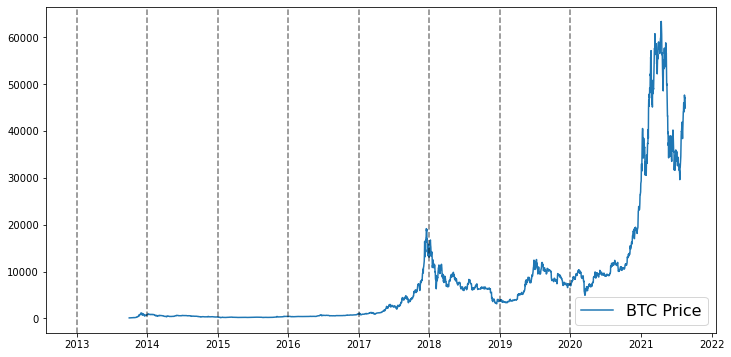

In [158]:
plt.figure(figsize=(12,6))
btc_price_df2, = plt.plot(btc_price_df2['BTC Price'])
#heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2013, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['BTC Price'
            #, 'Heater'
           ], fontsize=16)

In [159]:
df['day_date'] = df['date1'].dt.to_period( freq = 'd')

In [160]:
df['date1'] 

0       2020-02-23 23:56:30
1       2016-12-01 13:35:00
2       2017-12-24 19:52:50
3       2019-04-16 15:08:43
4       2018-07-05 18:12:51
                ...        
15144   2018-03-05 23:00:56
15145   2017-07-06 13:32:11
15146   2017-05-09 17:25:04
15147   2019-11-08 16:53:32
15148   2018-02-03 17:42:43
Name: date1, Length: 15149, dtype: datetime64[ns]

In [161]:
df['date1'] = pd.to_datetime(df.date1).dt.tz_localize(None)

In [162]:
df['date2'] = df['date1'].dt.tz_localize(None)

In [163]:
df['date3'] = pd.to_datetime(df.date2)

In [164]:
df['date4'] = pd.to_datetime(df['date3']).dt.date

In [165]:
df['date4']

0        2020-02-23
1        2016-12-01
2        2017-12-24
3        2019-04-16
4        2018-07-05
            ...    
15144    2018-03-05
15145    2017-07-06
15146    2017-05-09
15147    2019-11-08
15148    2018-02-03
Name: date4, Length: 15149, dtype: object

### Get frequency of each cluster per day

In [211]:
df2 = df.loc[df["clusters"] == 1]

In [212]:
df2.value_counts(["date4", "clusters"])

date4       clusters
2019-01-22  1           9
2019-02-15  1           8
2017-08-22  1           8
2017-08-02  1           7
2019-03-09  1           7
                       ..
2017-09-27  1           1
2017-09-25  1           1
2017-09-01  1           1
2017-08-19  1           1
2020-12-29  1           1
Length: 606, dtype: int64

In [213]:
dfts1 = df2.groupby(by=["date4"], as_index=False).size()

# Keep topic 1 in this case because it's to do with sell

In [214]:
dfts1

date4  size
0    2016-01-24     1
1    2016-02-04     2
2    2016-02-15     1
3    2016-02-18     1
4    2016-02-22     1
..          ...   ...
601  2020-12-13     1
602  2020-12-17     1
603  2020-12-19     1
604  2020-12-21     1
605  2020-12-29     1

[606 rows x 2 columns]

In [216]:
dfts1['date4'].is_unique

True

## Join on the bitcoin price data

In [86]:
#dfts1 = dfts1.set_index('day_date')
#dfts1

clusters  size
day_date                  
2016-01-01         4     1
2016-01-03         4     1
2016-01-05         3     1
2016-01-05         4     1
2016-01-07         6     1
...              ...   ...
2020-12-29         3     2
2020-12-29         4     2
2020-12-29         5     2
2020-12-29         6     3
2020-12-29         7     3

[5642 rows x 2 columns]

In [217]:
dfts1['date4']

0      2016-01-24
1      2016-02-04
2      2016-02-15
3      2016-02-18
4      2016-02-22
          ...    
601    2020-12-13
602    2020-12-17
603    2020-12-19
604    2020-12-21
605    2020-12-29
Name: date4, Length: 606, dtype: object

In [218]:
btc_price_df['Date1']

Date
2013-10-01    2013-10-01
2013-10-02    2013-10-02
2013-10-03    2013-10-03
2013-10-04    2013-10-04
2013-10-05    2013-10-05
                 ...    
2021-08-14    2021-08-14
2021-08-15    2021-08-15
2021-08-16    2021-08-16
2021-08-17    2021-08-17
2021-08-18    2021-08-18
Name: Date1, Length: 2864, dtype: object

In [219]:
btc_price_df['Date1'].is_unique

True

In [231]:
dfts1['date4'].is_unique

True

In [249]:
merged_left = pd.merge(left=dfts1[['date4', 'size']], right=btc_price_df[['BTC Price', 'Date1']], how='left', left_on = 'date4', right_on='Date1')

In [250]:
merged_left

date4  size     BTC Price       Date1
0    2016-01-24     1    388.538000  2016-01-24
1    2016-02-04     2    370.433000  2016-02-04
2    2016-02-15     1    405.621000  2016-02-15
3    2016-02-18     1    417.492000  2016-02-18
4    2016-02-22     1    436.140000  2016-02-22
..          ...   ...           ...         ...
601  2020-12-13     1  18882.260171  2020-12-13
602  2020-12-17     1  21310.656262  2020-12-17
603  2020-12-19     1  23008.776257  2020-12-19
604  2020-12-21     1  23537.369891  2020-12-21
605  2020-12-29     1  26718.029463  2020-12-29

[606 rows x 4 columns]

In [251]:
btc_price_df

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2864 rows x 8 columns]

In [252]:
merged_left.to_csv('merged.csv')

In [237]:
merged_left

date4  size     BTC Price       Date1
0    2016-01-24     1    388.538000  2016-01-24
1    2016-02-04     2    370.433000  2016-02-04
2    2016-02-15     1    405.621000  2016-02-15
3    2016-02-18     1    417.492000  2016-02-18
4    2016-02-22     1    436.140000  2016-02-22
..          ...   ...           ...         ...
601  2020-12-13     1  18882.260171  2020-12-13
602  2020-12-17     1  21310.656262  2020-12-17
603  2020-12-19     1  23008.776257  2020-12-19
604  2020-12-21     1  23537.369891  2020-12-21
605  2020-12-29     1  26718.029463  2020-12-29

[606 rows x 4 columns]

In [239]:
merged_left['Date1'].is_unique

False

In [245]:
#duplicates
merged_left[merged_left.duplicated(['Date1'], keep=False)]

date4  size  BTC Price Date1
376  2018-11-10     2        NaN   NaN
377  2018-11-12     1        NaN   NaN
379  2018-11-16     3        NaN   NaN
380  2018-11-18     2        NaN   NaN
385  2018-12-08     2        NaN   NaN
386  2018-12-10     2        NaN   NaN
391  2018-12-22     2        NaN   NaN

In [357]:
dft = merged_left[['date4', 'BTC Price', 'size']]

In [358]:
dft

date4     BTC Price  size
0    2016-01-24    388.538000     1
1    2016-02-04    370.433000     2
2    2016-02-15    405.621000     1
3    2016-02-18    417.492000     1
4    2016-02-22    436.140000     1
..          ...           ...   ...
601  2020-12-13  18882.260171     1
602  2020-12-17  21310.656262     1
603  2020-12-19  23008.776257     1
604  2020-12-21  23537.369891     1
605  2020-12-29  26718.029463     1

[606 rows x 3 columns]

In [359]:
dft = dft.set_index('date4')

In [360]:
dft

BTC Price  size
date4                         
2016-01-24    388.538000     1
2016-02-04    370.433000     2
2016-02-15    405.621000     1
2016-02-18    417.492000     1
2016-02-22    436.140000     1
...                  ...   ...
2020-12-13  18882.260171     1
2020-12-17  21310.656262     1
2020-12-19  23008.776257     1
2020-12-21  23537.369891     1
2020-12-29  26718.029463     1

[606 rows x 2 columns]

In [361]:
dft[dft.isna().any(axis=1)]

BTC Price  size
date4                      
2018-11-10        NaN     2
2018-11-12        NaN     1
2018-11-16        NaN     3
2018-11-18        NaN     2
2018-12-08        NaN     2
2018-12-10        NaN     2
2018-12-22        NaN     2

In [362]:
dft = dft.bfill()

In [363]:
dft[dft.isna().any(axis=1)]

Empty DataFrame
Columns: [BTC Price, size]
Index: []

In [364]:
dft

BTC Price  size
date4                         
2016-01-24    388.538000     1
2016-02-04    370.433000     2
2016-02-15    405.621000     1
2016-02-18    417.492000     1
2016-02-22    436.140000     1
...                  ...   ...
2020-12-13  18882.260171     1
2020-12-17  21310.656262     1
2020-12-19  23008.776257     1
2020-12-21  23537.369891     1
2020-12-29  26718.029463     1

[606 rows x 2 columns]

In [365]:
dft1 = dft

In [366]:
dft1['datetest'] = dft.index

In [367]:
dft.index

Index([2016-01-24, 2016-02-04, 2016-02-15, 2016-02-18, 2016-02-22, 2016-02-28,
       2016-03-01, 2016-03-02, 2016-03-06, 2016-03-10,
       ...
       2020-11-29, 2020-12-01, 2020-12-05, 2020-12-07, 2020-12-11, 2020-12-13,
       2020-12-17, 2020-12-19, 2020-12-21, 2020-12-29],
      dtype='object', name='date4', length=606)

In [368]:
#dft2 = dft.asfreq(pd.infer_freq(dft.index))

In [369]:
dft['size2'] = dft['size']*1000

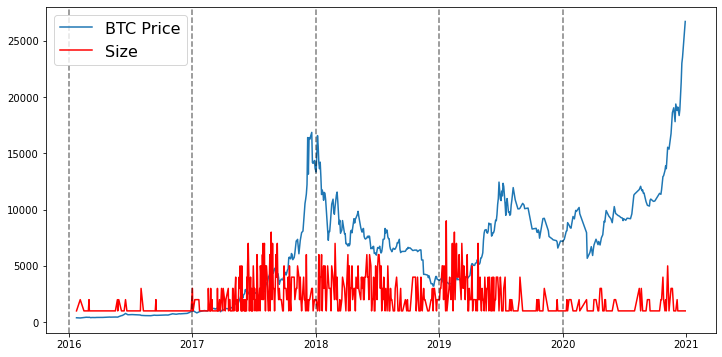

In [370]:
plt.figure(figsize=(12,6))
BTCprice, = plt.plot(dft['BTC Price'])
size, = plt.plot(dft['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['BTC Price', 'Size'], fontsize=16)

## Normalise

In [371]:
dft

BTC Price  size    datetest  size2
date4                                            
2016-01-24    388.538000     1  2016-01-24   1000
2016-02-04    370.433000     2  2016-02-04   2000
2016-02-15    405.621000     1  2016-02-15   1000
2016-02-18    417.492000     1  2016-02-18   1000
2016-02-22    436.140000     1  2016-02-22   1000
...                  ...   ...         ...    ...
2020-12-13  18882.260171     1  2020-12-13   1000
2020-12-17  21310.656262     1  2020-12-17   1000
2020-12-19  23008.776257     1  2020-12-19   1000
2020-12-21  23537.369891     1  2020-12-21   1000
2020-12-29  26718.029463     1  2020-12-29   1000

[606 rows x 4 columns]

In [372]:
dft1 = dft[['BTC Price', 'size2']]

In [373]:
dft1

BTC Price  size2
date4                          
2016-01-24    388.538000   1000
2016-02-04    370.433000   2000
2016-02-15    405.621000   1000
2016-02-18    417.492000   1000
2016-02-22    436.140000   1000
...                  ...    ...
2020-12-13  18882.260171   1000
2020-12-17  21310.656262   1000
2020-12-19  23008.776257   1000
2020-12-21  23537.369891   1000
2020-12-29  26718.029463   1000

[606 rows x 2 columns]

In [374]:
avgs = dft1.mean()
devs = dft1.std()

In [375]:
for col in dft1.columns:
    dft1[col] = (dft1[col] - avgs.loc[col]) / devs.loc[col]

<ipython-input-375-ac4df674f56b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1[col] = (dft1[col] - avgs.loc[col]) / devs.loc[col]


In [376]:
dft1

BTC Price     size2
date4                          
2016-01-24  -1.319775 -0.827801
2016-02-04  -1.323990 -0.183010
2016-02-15  -1.315798 -0.827801
2016-02-18  -1.313035 -0.827801
2016-02-22  -1.308694 -0.827801
...               ...       ...
2020-12-13   2.985391 -0.827801
2020-12-17   3.550699 -0.827801
2020-12-19   3.946006 -0.827801
2020-12-21   4.069058 -0.827801
2020-12-29   4.809486 -0.827801

[606 rows x 2 columns]

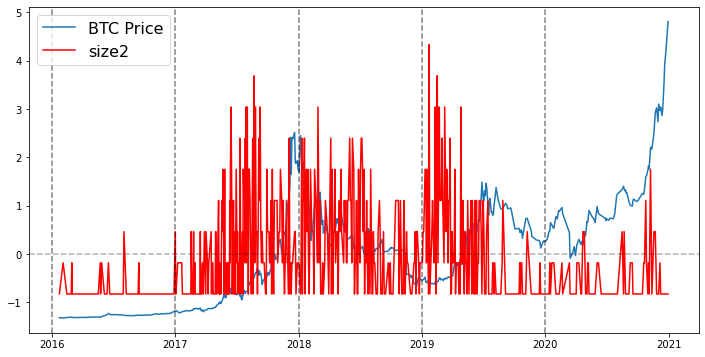

In [377]:
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['BTC Price', 'size2'], fontsize=16)

# Take First Difference to Remove Trend

In [378]:
dft1 = dft1.diff().dropna()

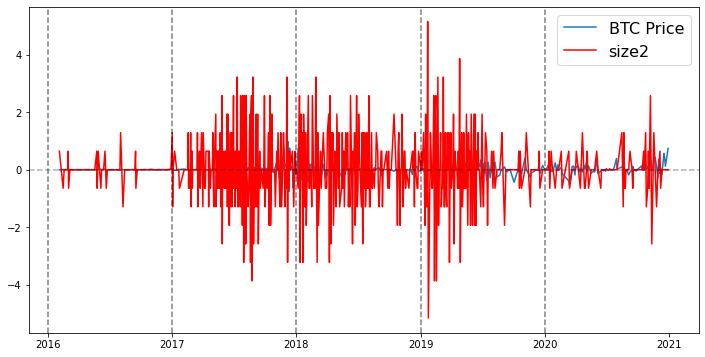

In [379]:
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['BTC Price', 'size2'], fontsize=16)

## Remove Increasing Volatility

In [382]:
dft1.index = pd.to_datetime(dft1.index)

In [383]:
annual_volatility = dft1.groupby(dft1.index.year).std()

In [386]:
dft1['BTC_annual_vol'] = dft1.index.map(lambda d: annual_volatility.loc[d.year, 'BTC Price'])
dft1['size2_annual_vol'] = dft1.index.map(lambda d: annual_volatility.loc[d.year, 'size2'])

In [385]:
dft1

BTC Price     size2  ice_cream_annual_vol  heater_annual_vol
date4                                                                   
2016-02-04  -0.004215  0.644791              0.008062           0.388824
2016-02-15   0.008191 -0.644791              0.008062           0.388824
2016-02-18   0.002763  0.000000              0.008062           0.388824
2016-02-22   0.004341  0.000000              0.008062           0.388824
2016-02-28  -0.002476  0.000000              0.008062           0.388824
...               ...       ...                   ...                ...
2020-12-13   0.121699  0.000000              0.184311           0.652077
2020-12-17   0.565308  0.000000              0.184311           0.652077
2020-12-19   0.395307  0.000000              0.184311           0.652077
2020-12-21   0.123052  0.000000              0.184311           0.652077
2020-12-29   0.740428  0.000000              0.184311           0.652077

[605 rows x 4 columns]

In [387]:
dft1['BTC Price'] = dft1['BTC Price'] / dft1['BTC_annual_vol']
dft1['size2'] = dft1['size2'] / dft1['size2_annual_vol']

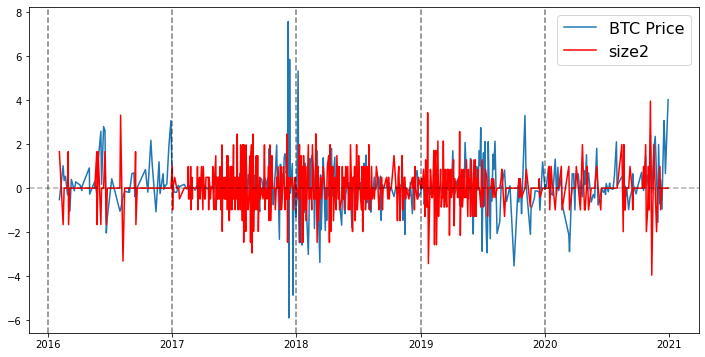

In [388]:
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['BTC Price', 'size2'], fontsize=16)

# Remove Seasonality

In [389]:
month_avgs = dft1.groupby(dft1.index.month).mean()

In [390]:
print(month_avgs)

       BTC Price     size2  ice_cream_annual_vol  heater_annual_vol  \
date4                                                                 
1      -0.089550  0.032957              0.142872           1.226350   
2       0.059527  0.049939              0.124653           1.184604   
3      -0.193968 -0.055701              0.120967           1.200600   
4       0.168058  0.020219              0.133049           1.191757   
5       0.136736  0.032639              0.124136           1.191088   
6       0.165590 -0.030192              0.125896           1.183321   
7       0.008319 -0.001061              0.132016           1.261724   
8       0.023014  0.006964              0.123453           1.114933   
9      -0.048301 -0.019888              0.122886           1.076280   
10      0.108032 -0.011609              0.131338           1.167273   
11      0.273075 -0.036993              0.130971           1.105696   
12      0.488473  0.010961              0.120387           1.040700   

     

In [391]:
dft1['BTC_month_avg'] = dft1.index.map(lambda d: month_avgs.loc[d.month, 'BTC Price'])
dft1['size2_month_avg'] = dft1.index.map(lambda d: month_avgs.loc[d.month, 'size2'])

In [392]:
dft1['BTC Price'] = dft1['BTC Price'] - dft1['BTC_month_avg']
dft1['size2'] = dft1['size2'] - dft1['size2_month_avg']

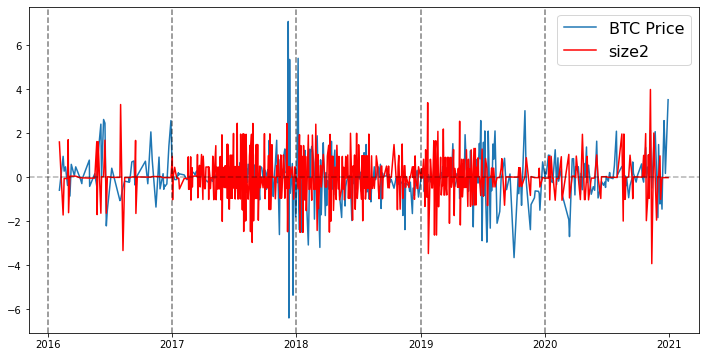

In [393]:
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['BTC Price', 'size2'], fontsize=16)

# PACF - Heater

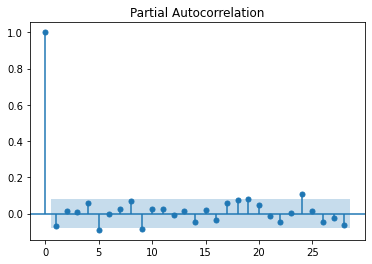

In [395]:
plot_pacf(dft1['BTC Price'])
plt.show()

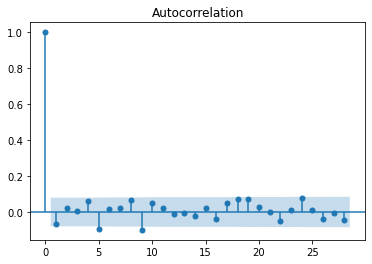

In [396]:
plot_acf(dft1['BTC Price'])
plt.show()

In [400]:
dft1

BTC Price     size2  ice_cream_annual_vol  heater_annual_vol  \
date4                                                                      
2016-02-04  -0.582288  1.608374              0.008062           0.388824   
2016-02-15   0.956487 -1.708251              0.008062           0.388824   
2016-02-18   0.283235 -0.049939              0.008062           0.388824   
2016-02-22   0.478913 -0.049939              0.008062           0.388824   
2016-02-28  -0.366687 -0.049939              0.008062           0.388824   
...               ...       ...                   ...                ...   
2020-12-13   0.171819 -0.010961              0.184311           0.652077   
2020-12-17   2.578668 -0.010961              0.184311           0.652077   
2020-12-19   1.656306 -0.010961              0.184311           0.652077   
2020-12-21   0.179157 -0.010961              0.184311           0.652077   
2020-12-29   3.528801 -0.010961              0.184311           0.652077   

            BTC_annual_vol  size2_annual_vol  BTC_month_avg  size2_month_avg  
date4                                                                         
2016-02-04        0.008062          0.388824       0.059527         0.049939  
2016-02-15        0.008062          0.388824       0.059527         0.049939  
2016-02-18        0.008062          0.388824       0.059527         0.049939  
2016-02-22        0.008062          0.388824       0.059527         0.049939  
2016-02-28        0.008062          0.388824       0.059527         0.049939  
...                    ...               ...            ...              ...  
2020-12-13        0.184311          0.652077       0.488473         0.010961  
2020-12-17        0.184311          0.652077       0.488473         0.010961  
2020-12-19        0.184311          0.652077       0.488473         0.010961  
2020-12-21        0.184311          0.652077       0.488473         0.010961  
2020-12-29        0.184311          0.652077       0.488473         0.010961  

[605 rows x 8 columns]

In [424]:
dft1['BTC Price'].iloc[1:]

date4
2016-02-15    0.956487
2016-02-18    0.283235
2016-02-22    0.478913
2016-02-28   -0.366687
2016-03-01    0.509386
                ...   
2020-12-13    0.171819
2020-12-17    2.578668
2020-12-19    1.656306
2020-12-21    0.179157
2020-12-29    3.528801
Name: BTC Price, Length: 604, dtype: float64

In [427]:
for lag in range(1, 30):
    heater_series = dft1['BTC Price'].iloc[lag:]
    lagged_ice_cream_series = dft1['size2'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
(-0.06442765801037985, 0.11370339522118317)
------
Lag: 2
(0.07554559485732831, 0.06375308232814182)
------
Lag: 3
(-0.027494909346884634, 0.5007362742181356)
------
Lag: 4
(0.005478025401719965, 0.8933892386151443)
------
Lag: 5
(-0.02186610237403548, 0.5929576577571941)
------
Lag: 6
(0.0632071753115454, 0.12227936729065629)
------
Lag: 7
(-0.07224416715221582, 0.07751799411696705)
------
Lag: 8
(0.038927664366019805, 0.3423618820213675)
------
Lag: 9
(-0.01114656423750327, 0.7859607659451362)
------
Lag: 10
(0.030944325380496265, 0.45120574898491184)
------
Lag: 11
(-0.05138950998684965, 0.21105880727045861)
------
Lag: 12
(0.02228370063194615, 0.5881176178046297)
------
Lag: 13
(-0.0159774020201911, 0.698052960912279)
------
Lag: 14
(-0.00022741769065820483, 0.995598148156236)
------
Lag: 15
(-0.013148244070941548, 0.7499492943270283)
------
Lag: 16
(0.0049053200291486725, 0.905436494736919)
------
Lag: 17
(0.045092097865915004, 0.2749852769876629)
------
Lag: 18
(-0.0103095

In [ ]:
# for above, look when the p value, which is on the right hand side, is less than 0.05. this tells us the lag of the topic correlates to the price of bitcoin. 
# the ncan do the var model